## Company Bankruptcy Prediction

In [1]:
# Importing Required Libraries and Modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf

from sklearn.metrics import classification_report, f1_score, confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

import pickle
import warnings
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
# Reading the Data from CSV File
data = pd.read_csv('data.csv')
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
# Checking for Missing Values
is_nan_val = data.isna().sum()
is_nan_val[is_nan_val > 0]

Series([], dtype: int64)

In [4]:
# Descriptive Statistics of the Data
data_describe = data.describe().T
data_describe

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


In [5]:
# Separating Features and Target Variable
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

In [6]:
# Count of Target Variable Classes
y.value_counts().values

array([6599,  220], dtype=int64)

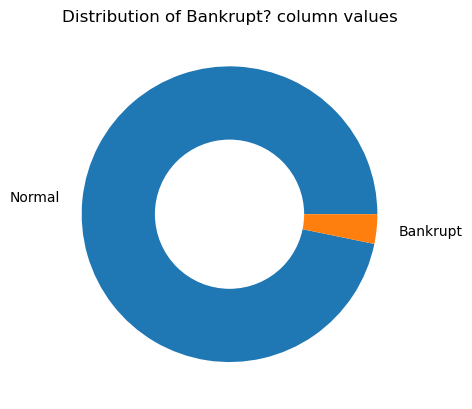

In [7]:
# Create data
size_of_groups=y.value_counts().values

# Create a pieplot
plt.pie(size_of_groups, labels=['Normal', "Bankrupt"], labeldistance=1.15)

# Add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Distribution of Bankrupt? column values')

plt.show()

In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=73)

In [9]:
# Create an instance of the MinMaxScaler class
scaler = MinMaxScaler()

# Scale the training data using the scaler
X_train_scaled = scaler.fit_transform(X_train)

# Apply the learned scaling parameters to transform the test data
X_test_scaled = scaler.transform(X_test)

In [10]:
# Calculate and normalize the value counts of y_train
normalized_counts = y_train.value_counts(normalize=True)


### Models

In [11]:
# Create a dictionary of machine learning models
models_dict = {
    "MLPClassifier": MLPClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost":  XGBClassifier(),
    "LGB": LGBMClassifier(),
    "SupportVectorMachines": SVC()
}

In [12]:
# Create a dictionary of model parameters
params_dict = {
    "MLPClassifier_params" : {
        'hidden_layer_sizes': [(10,30,10),(20,)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant','adaptive']
    },
    
    "RandomForest_params" : {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'class_weight': ['balanced', 'balanced_subsample']
    },

    "XGBoost_params" : {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.1, 0.01, 0.001],
        'scale_pos_weight': [1, 5, 10]
    },

    "LGB_params" : {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, -1],
        'learning_rate': [0.1, 0.01, 0.001],
        'class_weight': ['balanced', None]
    },
    
    "SupportVectorMachines_params" : {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'class_weight': ['balanced', None]
    }
}    

In [13]:
def train_model(model, params, X_train, y_train):
    """
    Trains a model using the given parameters on the provided training data.

    Args:
        model: The machine learning model to train.
        params: The parameter grid to search over during training.
        X_train: The input features of the training data.
        y_train: The target labels of the training data.

    Returns:
        The trained model after performing grid search.

    """
    print(f"{model} started training ...")
    
    # Perform grid search using cross-validation
    model_gscv = GridSearchCV(model, params)
    
    # Specify GPU device for training (optional)
    with tf.device('/GPU:0'):
        model_gscv.fit(X_train, y_train)
    
    # Print best parameters and score
    print("Best parameters:", model_gscv.best_params_)
    print("Best score:", model_gscv.best_score_)
    
    # Make predictions on test data and print classification report
    pred = model_gscv.predict(X_test_scaled)
    print(classification_report(y_test, pred))
    
    return model_gscv

In [14]:
def result_plot(y_test, y_pred): 
    # Define the false positive rate and true positive rate for the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    # Define the AUC score for the ROC curve
    auc_score = roc_auc_score(y_test, y_pred)
    
    # Create a 1x2 subplot
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    
    # Plot the confusion matrix heatmap in the first subplot
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.0f', cbar = False, cmap="Blues", ax = ax[0])
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('True')
    ax[0].set_title('Confusion Matrix', fontsize=12)
    
    # Plot the ROC curve in the second subplot
    ax[1].plot(fpr, tpr, color='orange', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
    ax[1].plot([0, 1], [0, 1], linestyle='--', color='navy')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=12)
    ax[1].legend()
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    plt.show()

MLPClassifier() strated training ...


C:\Users\qiziq\AppData\Local\anaconda3\envs\gputensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\qiziq\AppData\Local\anaconda3\envs\gputensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\qiziq\AppData\Local\anaconda3\envs\gputensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\qiziq\AppData\Local\anaconda3\envs\gputensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best score: 0.9689092171637466
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1650
           1       0.44      0.22      0.29        55

    accuracy                           0.97      1705
   macro avg       0.71      0.60      0.64      1705
weighted avg       0.96      0.97      0.96      1705



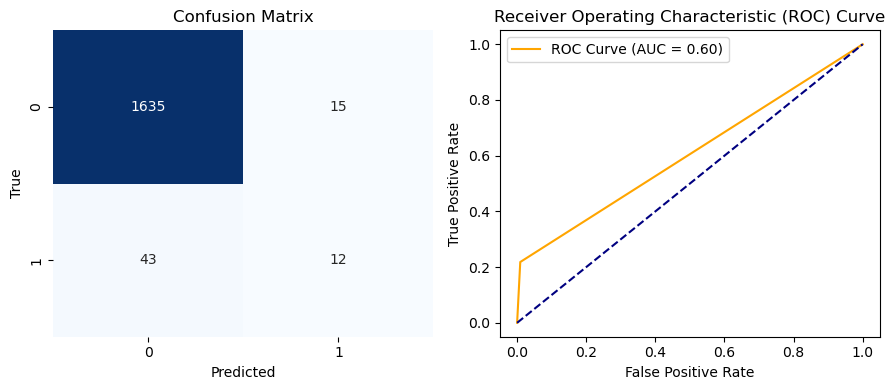

--------------------------------------------------
RandomForestClassifier() strated training ...
Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.9694951535428779
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1650
           1       0.39      0.20      0.27        55

    accuracy                           0.96      1705
   macro avg       0.68      0.59      0.62      1705
weighted avg       0.96      0.96      0.96      1705



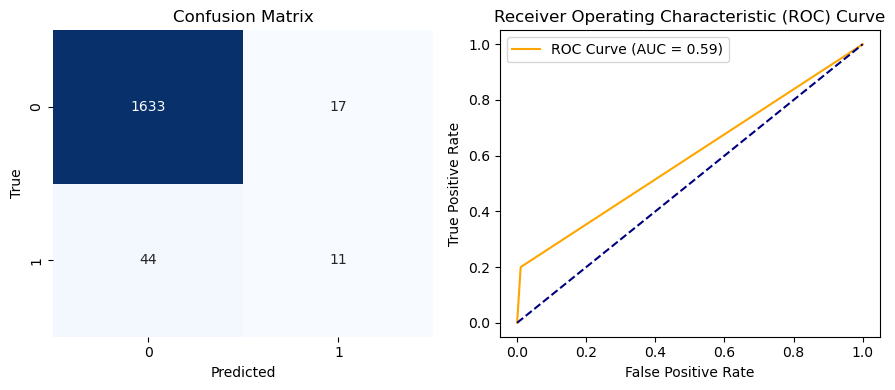

--------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) strated training ...
Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'scale_pos_weight': 1}
Best score: 0.9732114402021604
              precision    recall  f1-score  

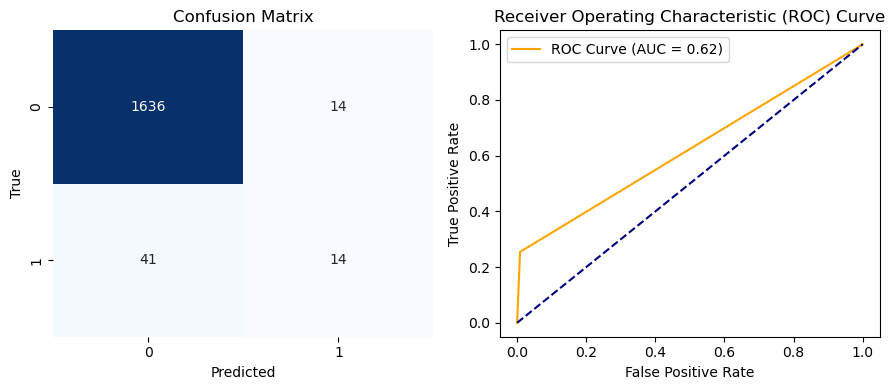

--------------------------------------------------
LGBMClassifier() strated training ...
Best parameters: {'class_weight': None, 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200}
Best score: 0.974775850162505
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1650
           1       0.57      0.31      0.40        55

    accuracy                           0.97      1705
   macro avg       0.77      0.65      0.69      1705
weighted avg       0.96      0.97      0.97      1705



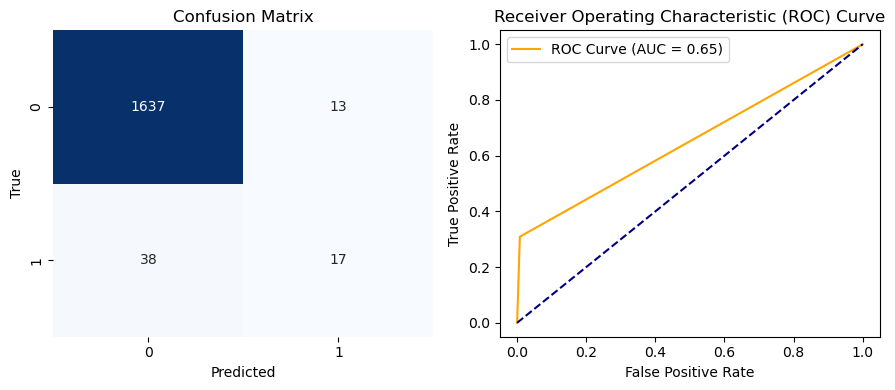

--------------------------------------------------
SVC() strated training ...
Best parameters: {'C': 10, 'class_weight': None, 'kernel': 'rbf'}
Best score: 0.968518019026194
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1650
           1       1.00      0.05      0.10        55

    accuracy                           0.97      1705
   macro avg       0.98      0.53      0.54      1705
weighted avg       0.97      0.97      0.96      1705



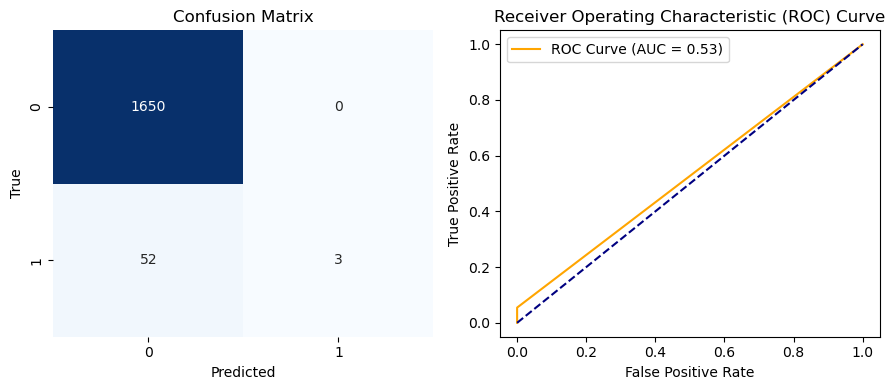

--------------------------------------------------


In [66]:
# Iterate over the models in the models_dict and train each model
for model in models_dict:
    # Train the model using train_model() function
    model_gscv = train_model(models_dict[model], params_dict[model + "_params"], X_train_scaled, y_train)
    
    # Make predictions on the test data using the trained model
    pred = model_gscv.predict(X_test_scaled)
    
    # Update the models_dict with the trained model
    models_dict[model] = model_gscv
    
    # Plot the results and print a separator
    result_plot(y_test, pred)
    print("-" * 50)

In [67]:
# Save the trained models using pickle
for model in models_dict:
    # Open a file to write the model
    with open(f'{model}.pkl', 'wb') as file:
        # Use pickle to dump the model into the file
        pickle.dump(models_dict[model], file)

### After Resampling Technique

In [15]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [16]:
# Create a dictionary of machine learning models
models_dict_smote = {
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "XGBoost":  XGBClassifier(),
    "LGB": LGBMClassifier(),
    "SupportVectorMachines": SVC()
}

MLPClassifier(max_iter=1000) started training ...


C:\Users\qiziq\AppData\Local\anaconda3\envs\gputensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\qiziq\AppData\Local\anaconda3\envs\gputensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\qiziq\AppData\Local\anaconda3\envs\gputensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\qiziq\AppData\Local\anaconda3\envs\gputensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reac

Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best score: 0.9632267087244349
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1650
           1       0.29      0.62      0.40        55

    accuracy                           0.94      1705
   macro avg       0.64      0.78      0.68      1705
weighted avg       0.96      0.94      0.95      1705



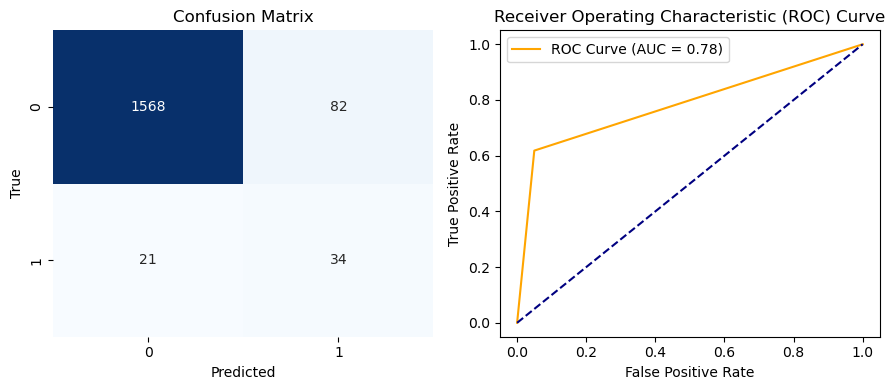

--------------------------------------------------
RandomForestClassifier() started training ...
Best parameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.9812089566713114
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1650
           1       0.37      0.53      0.44        55

    accuracy                           0.96      1705
   macro avg       0.68      0.75      0.71      1705
weighted avg       0.96      0.96      0.96      1705



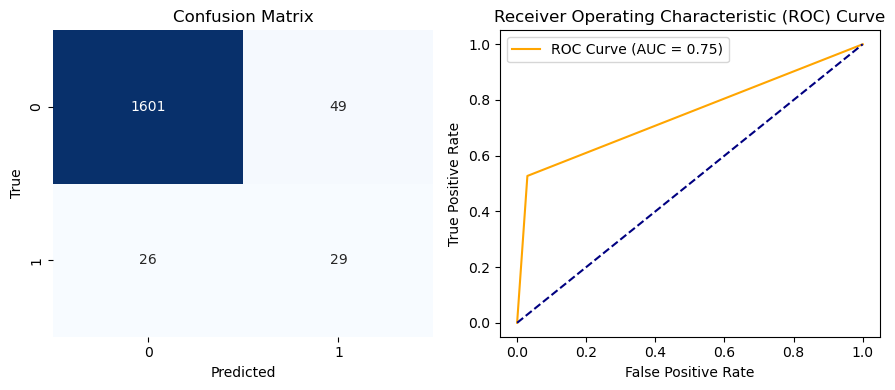

--------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) started training ...
Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'scale_pos_weight': 1}
Best score: 0.9879777563405658
              precision    recall  f1-score  

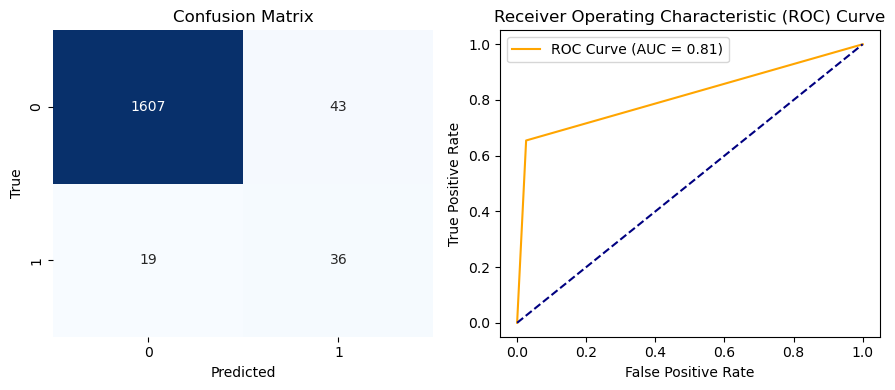

--------------------------------------------------
LGBMClassifier() started training ...
Best parameters: {'class_weight': None, 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 300}
Best score: 0.9910085187396961
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1650
           1       0.43      0.45      0.44        55

    accuracy                           0.96      1705
   macro avg       0.71      0.72      0.71      1705
weighted avg       0.96      0.96      0.96      1705



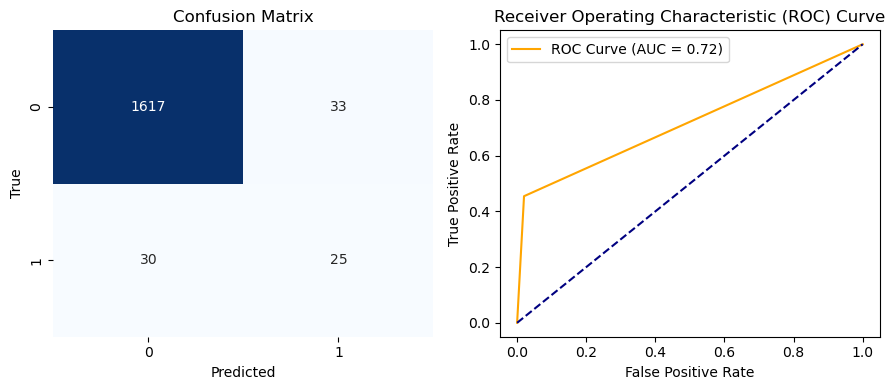

--------------------------------------------------
SVC() started training ...
Best parameters: {'C': 10, 'class_weight': 'balanced', 'kernel': 'rbf'}
Best score: 0.9395854961948948
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1650
           1       0.24      0.82      0.37        55

    accuracy                           0.91      1705
   macro avg       0.62      0.87      0.66      1705
weighted avg       0.97      0.91      0.93      1705



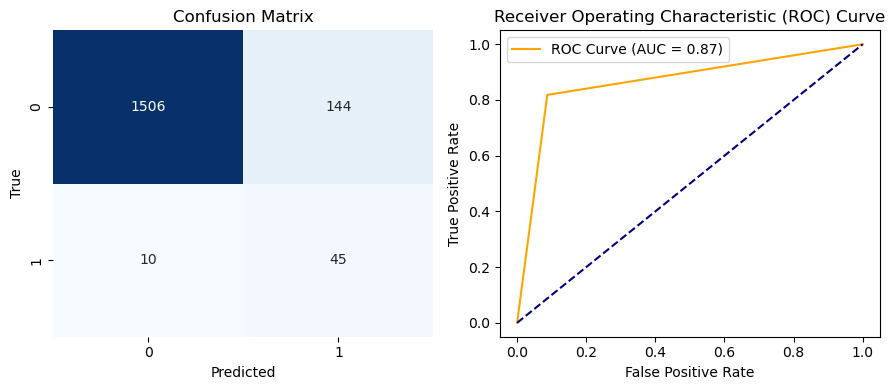

--------------------------------------------------


In [19]:
warnings.simplefilter('module')

# Iterate over the models in the models_dict and train each model
for model in models_dict_smote:
    
    # Train the model using train_model() function
    model_gscv = train_model(models_dict_smote[model],
                             params_dict[model + "_params"],
                             X_resampled, y_resampled)
    
    # Make predictions on the test data using the trained model
    pred = model_gscv.predict(X_test_scaled)
    
    # Update the models_dict with the trained model
    models_dict_smote[model] = model_gscv
    
    # Plot the results and print a separator
    result_plot(y_test, pred)
    print("-" * 50)

In [20]:
# Save the trained models using pickle
for model in models_dict_smote:
    # Open a file to write the model
    with open(f'{model}_smote.pkl', 'wb') as file:
        # Use pickle to dump the model into the file
        pickle.dump(models_dict_smote[model], file)